# Predicting House Prices
I'm creating this project to come back to with plenty of examples to refer to. The code and cells will be very hand-holdy, so I can remember what I was doing.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

from utils.utils import setup_project_root

In [2]:
setup_project_root()

WindowsPath('C:/Users/zak/Projects/PycharmProjects/data-science')

## Step 0: Load the data and look at it
Check the data types and look at the columns for missing data. Do the columns with full data even make sense?

In [3]:
unaltered_melbourne_house_prices_df = pd.read_csv('data/melb_data.csv')
unaltered_melbourne_house_prices_df.info()
# The Date column is not a date type. Could you write a function to check for this?
# TODO: Create a function to automatically check for date columns and for the other things I care about.
unaltered_melbourne_house_prices_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


## Super Naive Prediction
Let's predict house price with the dataset as is. This is currently rubbish. I think check how to use pipelines to create something more concrete, reusable and to follow best practices.

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
# from sklearn.compose import ColumnTransformer
# Pipeline seems really important
# Keeping track of dataframe changes seems really important

# 1) Start from original df so we have the Date column
og = unaltered_melbourne_house_prices_df.copy(deep=True)

# 2) Parse date and sort by it
og['Date'] = pd.to_datetime(og['Date'], format='%d/%m/%Y')
ord = og['Date'].sort_values().index

# 3) Build X, y (keep it numeric only if you like)
df_num = og.select_dtypes(include=[np.number])
X = df_num.drop(columns=['Price'])
y = df_num['Price']

# 4) Apply the time order to X and y
X = X.loc[ord]
y = y.loc[ord]

# 5) Define the splitter (5 folds, expanding window by default)
tss = TimeSeriesSplit(n_splits=5)

# 6) Model
model = DecisionTreeRegressor(random_state=0)

# 7) Evaluate with cross_val_score (MAE example)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv_mae = cross_val_score(model, X, y, cv=tss, scoring=mae_scorer)
print('TimeSeriesSplit MAE per fold:', -cv_mae)
print('MAE mean ± std:', -cv_mae.mean(), cv_mae.std())

# TODO: Really hone in on model pipelines in order to follow best practices.

# Ignore time dependent variables for now. Not trying to predict into the future.
# Use only two features for the model. Find the best two features.
# mean square error, does mean percentage error lead to different variables?
# Linear models only

TimeSeriesSplit MAE per fold: [260471.44454264 260947.04639859 270289.31683606 275800.95227574
 249548.63411401]
MAE mean ± std: 263411.478833407 9029.943525181456


In [6]:
# USE og_melbourne_house_prices_df_numeric FOR THE ORIGINAL DATAFRAME

def model_score_progress(original_df, current_df):

    def calculate_mae(df):
        df = df.select_dtypes(include=[np.number])
        y = df['Price']
        # Create the features X by dropping the Price column
        X = df.drop('Price', axis=1)
        # Now, split both X and y into training and validation sets
        train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
        # Define model
        melbourne_model = DecisionTreeRegressor(random_state=0)
        # Fit model
        melbourne_model.fit(train_X, train_y)
        # get predicted prices on validation data
        val_predictions = melbourne_model.predict(val_X)
        mae = mean_absolute_error(val_y, val_predictions)
        rsme = root_mean_squared_error(val_y, val_predictions)
        r2 = melbourne_model.score(val_X, val_y)
        return {'mae': mae, 'rmse': rsme, 'r2':r2}

    return {'new_data': calculate_mae(current_df), 'og_data': calculate_mae(original_df)}

## Step 1:  Data Types and Easy Features
Start by checking the data types of the variables. Does anything need converting?

In [160]:
# If a column is like "Date" but not a date. Extract Date format and convert to datetime. Create new columns for season, month and year.
# Test if a value in a column can be converted to a float. Yes No Sometimes return some of the values that can or cannot.
# Loop through columns and check for missing values. Can any be imputed based on the rules we've come up with? Suggest the columns that could be a candidate for imputing the missing data.
# For every variable chart its distribution and get some descriptive statistics and probability distributions.
# Derive some maths rather than using the built-in functions.
# Itertools and matrix math to keep things performant

In [7]:
# Create a deep copy of the dataframe to avoid altering the original file.
df = unaltered_melbourne_house_prices_df.copy(deep=True)

In [8]:
df['Date'] = pd.to_datetime(df.Date, format="%d/%m/%Y")


In [9]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df[['Month', 'Year']]

,Month,Year
0,12,2016
1,2,2016
2,3,2017
3,3,2017
4,6,2016
...,...,...
13575,8,2017
13576,8,2017
13577,8,2017
13578,8,2017


In [10]:
# Extract month
df['Month'] = df['Date'].dt.month


# Map month to season (Southern Hemisphere - Melbourne)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:  # 9, 10, 11
        return 'Spring'


df['Season'] = df['Month'].apply(get_season)
df[['Date', 'Month', 'Season', 'Year']].head()

,Date,Month,Season,Year
0,2016-12-03,12,Summer,2016
1,2016-02-04,2,Summer,2016
2,2017-03-04,3,Autumn,2017
3,2017-03-04,3,Autumn,2017
4,2016-06-04,6,Winter,2016


In [165]:
# One Hot Encoding
pd.get_dummies(data=df, columns=['Season'])

# Ordinal Encoding: give a number to each value in the categorical data.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Lattitude,Longtitude,Regionname,Propertycount,Month,Year,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,-37.79960,144.99840,Northern Metropolitan,4019.0,12,2016,False,False,True,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,-37.80790,144.99340,Northern Metropolitan,4019.0,2,2016,False,False,True,False
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,-37.80930,144.99440,Northern Metropolitan,4019.0,3,2017,True,False,False,False
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,-37.79690,144.99690,Northern Metropolitan,4019.0,3,2017,True,False,False,False
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,-37.80720,144.99410,Northern Metropolitan,4019.0,6,2016,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,2017-08-26,16.7,3150.0,...,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,8,2017,False,False,False,True
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3016.0,...,-37.85927,144.87904,Western Metropolitan,6380.0,8,2017,False,False,False,True
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,2017-08-26,6.8,3016.0,...,-37.85274,144.88738,Western Metropolitan,6380.0,8,2017,False,False,False,True
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,3016.0,...,-37.85908,144.89299,Western Metropolitan,6380.0,8,2017,False,False,False,True


In [12]:
# Why does this value fluctuate?
model_score_progress(original_df=og_melbourne_house_prices_df, current_df=df)

NameError: name 'og_melbourne_house_prices_df' is not defined

- Cross validation on this.
- Confidence interval

## Step 2: Missing Data
How much missing data do we have?

In [167]:
print(df.isna().mean())
df

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000000
Postcode         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.004566
Landsize         0.000000
BuildingArea     0.474963
YearBuilt        0.395803
CouncilArea      0.100810
Lattitude        0.000000
Longtitude       0.000000
Regionname       0.000000
Propertycount    0.000000
Month            0.000000
Year             0.000000
Season           0.000000
dtype: float64


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year,Season
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,12,2016,Summer
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,2,2016,Summer
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3,2017,Autumn
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3,2017,Autumn
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,6,2016,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,2017-08-26,16.7,3150.0,...,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,8,2017,Winter
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3016.0,...,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,8,2017,Winter
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,2017-08-26,6.8,3016.0,...,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,8,2017,Winter
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,3016.0,...,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,8,2017,Winter


<Axes: >

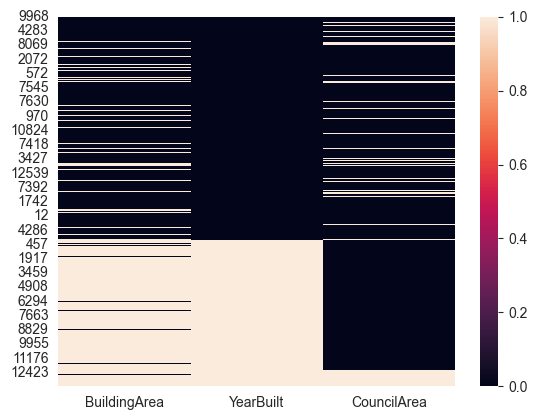

In [168]:
sns.heatmap(df.sort_values('YearBuilt')[['BuildingArea', 'YearBuilt', 'CouncilArea']].isna())

<Axes: >

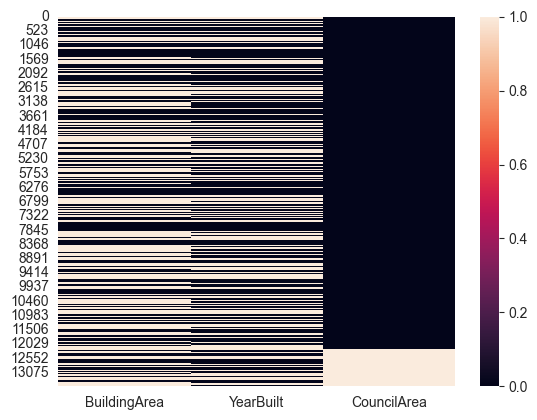

In [169]:
sns.heatmap(df[['BuildingArea', 'YearBuilt', 'CouncilArea']].isna())

In [170]:
df.loc[df['YearBuilt'].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year,Season
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,12,2016,Summer
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3,2017,Autumn
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,2016-05-07,2.5,3067.0,...,NaN,NaN,Yarra,-37.80410,144.99530,Northern Metropolitan,4019.0,5,2016,Autumn
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,2016-10-08,2.5,3067.0,...,NaN,NaN,Yarra,-37.80080,144.99730,Northern Metropolitan,4019.0,10,2016,Spring
10,Abbotsford,411/8 Grosvenor St,2,u,700000.0,VB,Jellis,2016-11-12,2.5,3067.0,...,NaN,NaN,Yarra,-37.81100,145.00670,Northern Metropolitan,4019.0,11,2016,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13566,Vermont South,9 Winswood Cl,4,h,1250000.0,PI,Philip,2017-08-26,17.2,3133.0,...,NaN,NaN,NaN,-37.84679,145.20051,Eastern Metropolitan,4280.0,8,2017,Winter
13567,Viewbank,149 Graham Rd,5,h,1316000.0,SP,Nelson,2017-08-26,8.9,3084.0,...,NaN,NaN,NaN,-37.73501,145.08341,Eastern Metropolitan,2698.0,8,2017,Winter
13569,Wantirna South,12 Armagh Cr,4,h,1323000.0,S,Barry,2017-08-26,14.7,3152.0,...,NaN,NaN,NaN,-37.87608,145.22390,Eastern Metropolitan,7082.0,8,2017,Winter
13570,Wantirna South,34 Fewster Dr,3,h,970000.0,S,Barry,2017-08-26,14.7,3152.0,...,NaN,NaN,NaN,-37.88360,145.22805,Eastern Metropolitan,7082.0,8,2017,Winter


## Step 3: Imputation

Can any of the fields be imputed?

<Axes: >

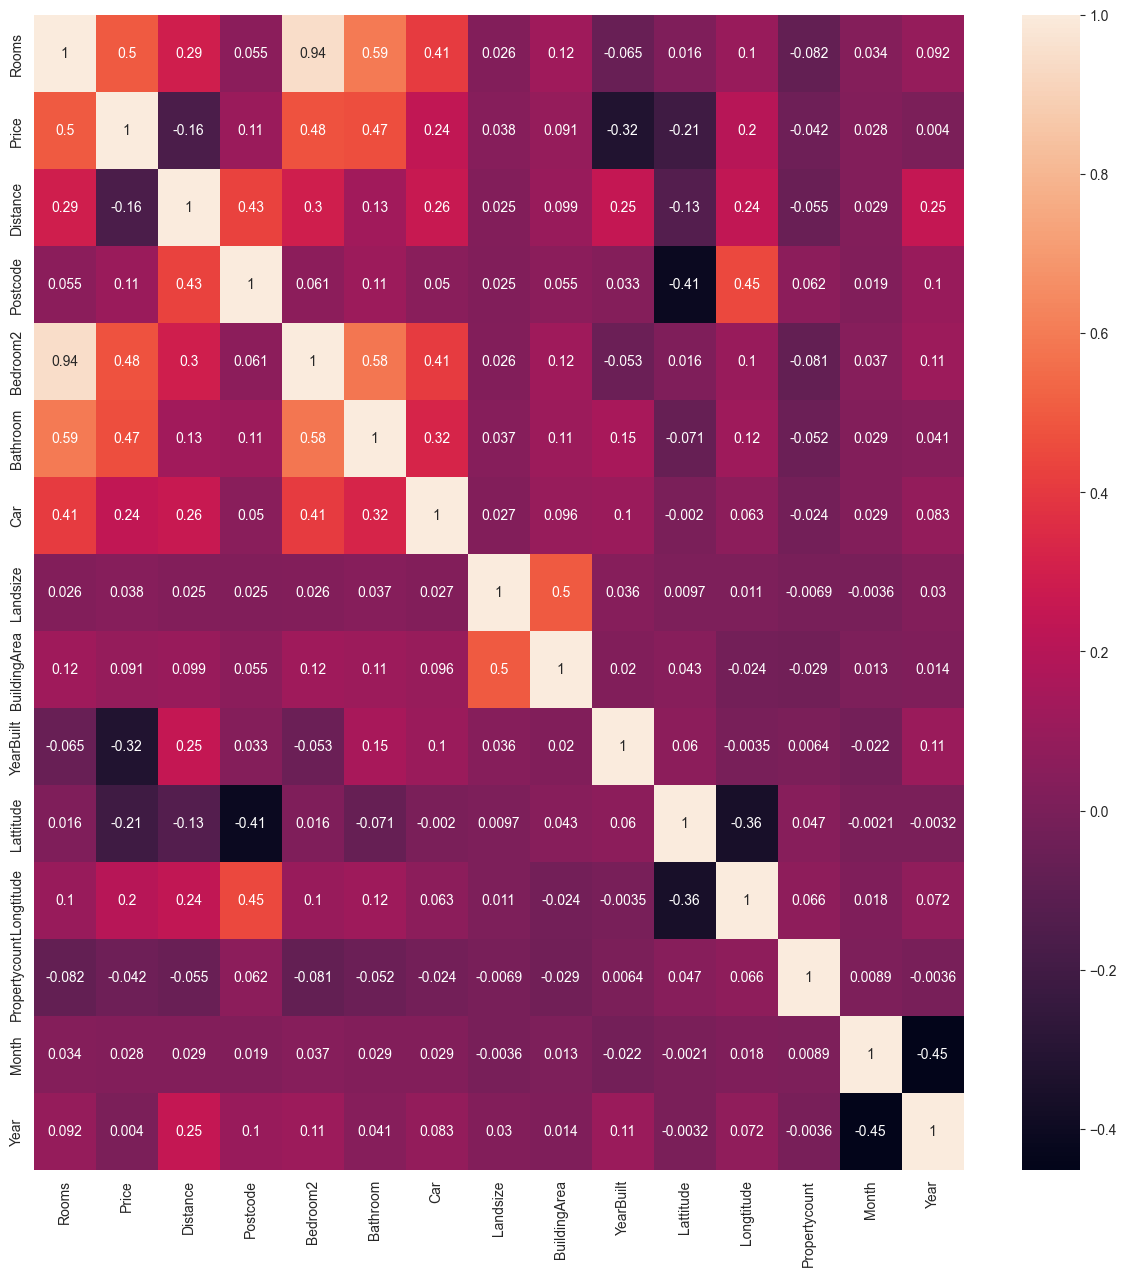

In [171]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Create heatmap with numeric data only
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_df.corr(), annot=True)

# Not to self: automatically show interesting ones

<Axes: xlabel='BuildingArea', ylabel='Landsize'>

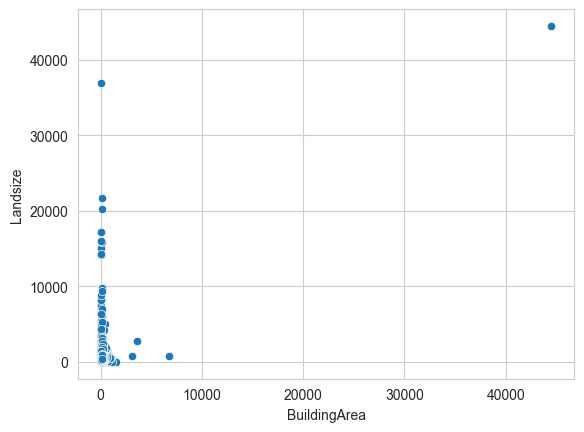

In [172]:
sns.scatterplot(df, x='BuildingArea', y='Landsize')

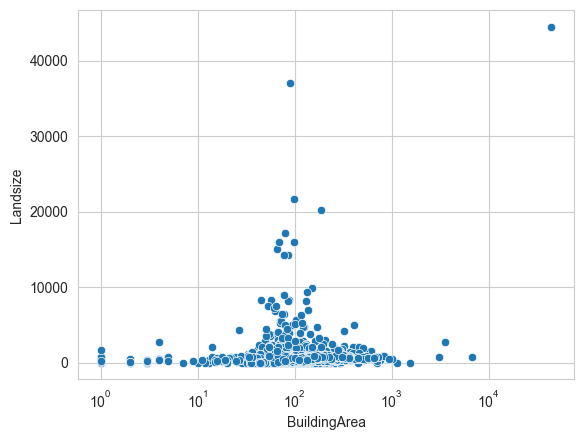

In [173]:
sns.scatterplot(df, x='BuildingArea', y='Landsize')
plt.xscale('log')

In [174]:

from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

numeric_df_mean = numeric_df.copy(deep=True)
numeric_df_median = numeric_df.copy(deep=True)

numeric_df_KNN = numeric_df.copy(deep=True)
numeric_df_MLR = numeric_df.copy(deep=True)

mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
KNN_imputer = KNNImputer()
MLR_imputer = IterativeImputer()

numeric_df_mean.iloc[:, :] = mean_imputer.fit_transform(numeric_df_mean)
numeric_df_median.iloc[:, :] = median_imputer.fit_transform(numeric_df_median)
numeric_df_KNN.iloc[:, :] = KNN_imputer.fit_transform(numeric_df_KNN)
numeric_df_MLR.iloc[:, :] = MLR_imputer.fit_transform(numeric_df_MLR)

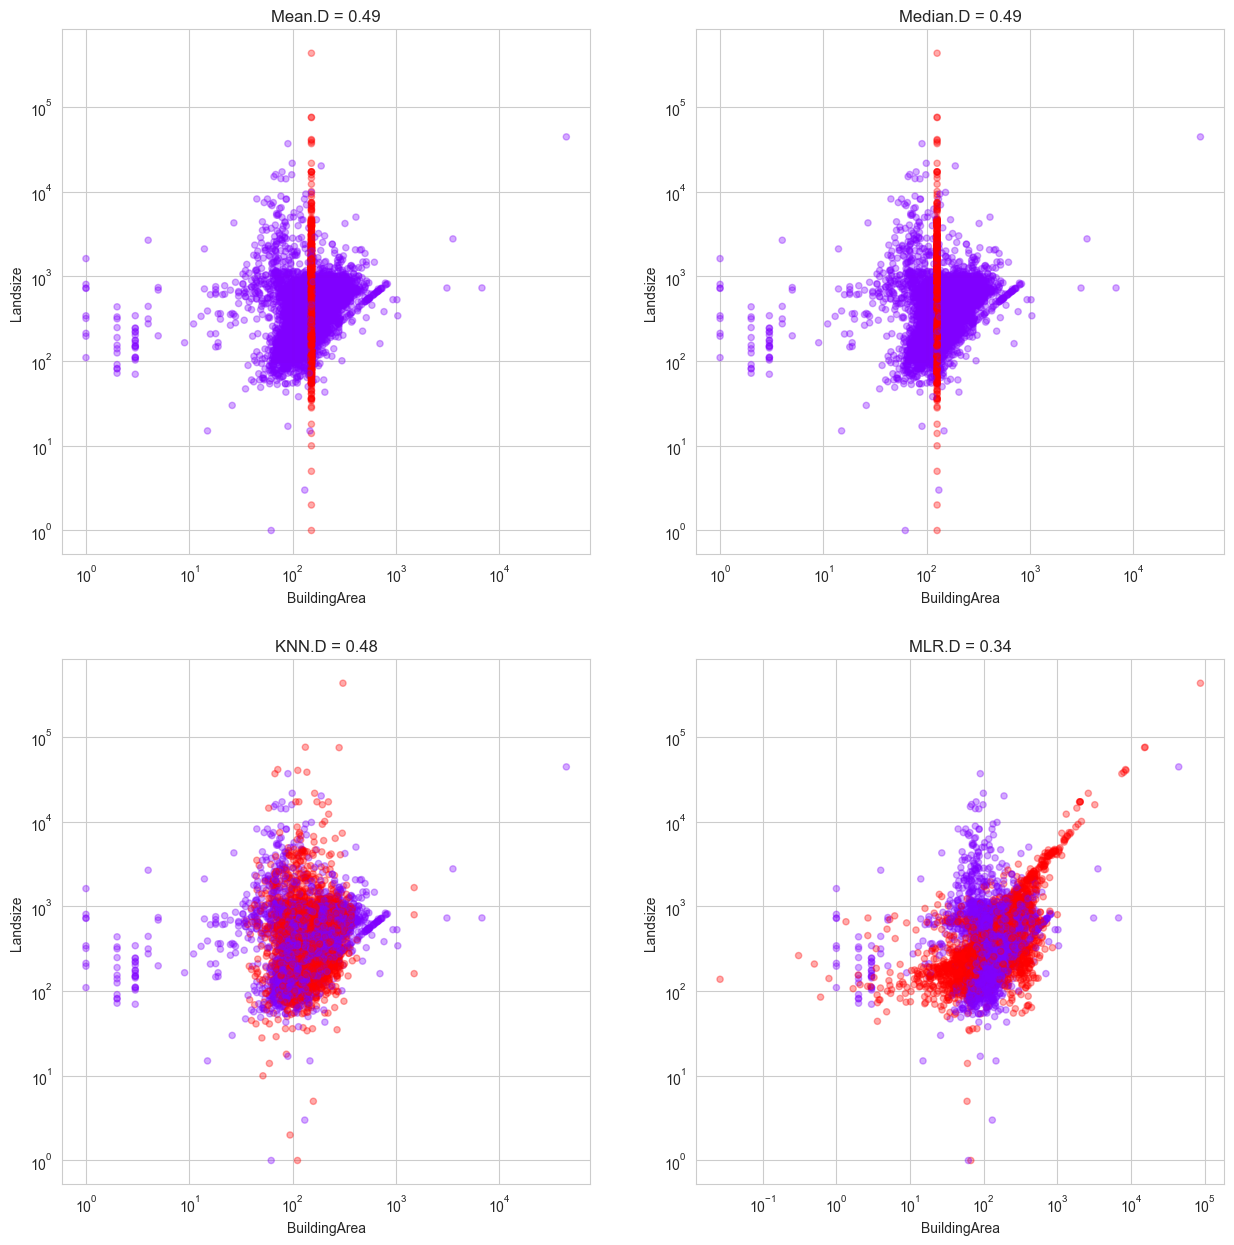

In [175]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
nulls = numeric_df['BuildingArea'].isnull() + numeric_df['Landsize'].isnull()

imputation_methods = {'Mean': numeric_df_mean, 'Median': numeric_df_median, 'KNN': numeric_df_KNN,
                      'MLR': numeric_df_MLR}
original_corr = 0.58
for method, axis in zip(imputation_methods, axes.flatten()):
    new_correlation = imputation_methods[method]['BuildingArea'].corr(imputation_methods[method]['Landsize'])
    distortion = round(np.abs(original_corr - new_correlation), 2)

    imputation_methods[method].plot(kind='scatter', x='BuildingArea', y='Landsize', c=nulls, cmap='rainbow',
                                    colorbar=False, title=f'{method}.D = {distortion}', alpha=1 / 3, ax=axis)
    axis.set_xscale('log')
    axis.set_yscale('log')


In [176]:
# Has Imputation had an effect?
model_score_progress(original_df=og_melbourne_house_prices_df, current_df=numeric_df_KNN)
# This seems consistently worse

{'new_data': {'mae': 235787.1855670103,
  'rmse': 417568.55276350095,
  'r2': 0.5884008379091209},
 'og_data': {'mae': 242869.63397152675,
  'rmse': 431420.2485014823,
  'r2': 0.5606405594386987}}

## Price Distribution

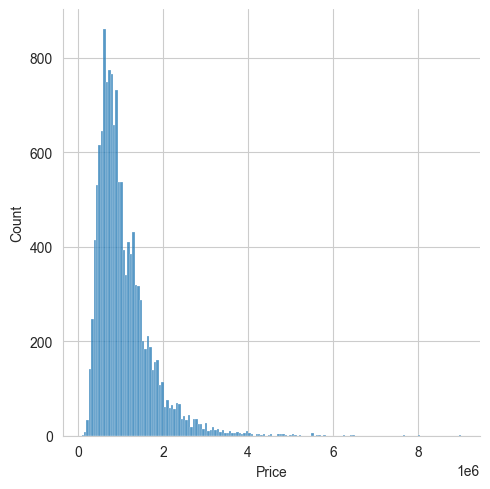

In [177]:
sns.displot(df, x='Price')
# Skewness: > 0 = right skew, < 0 = left skew, 0 = symmetric

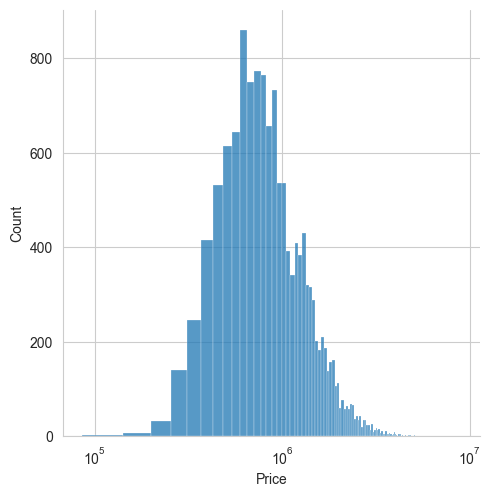

In [178]:
df['Price'].skew()
sns.displot(df, x='Price')
plt.xscale('log')

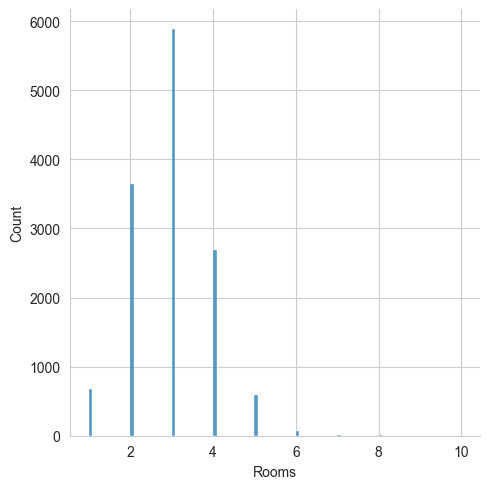

In [179]:
sns.displot(df, x='Rooms')

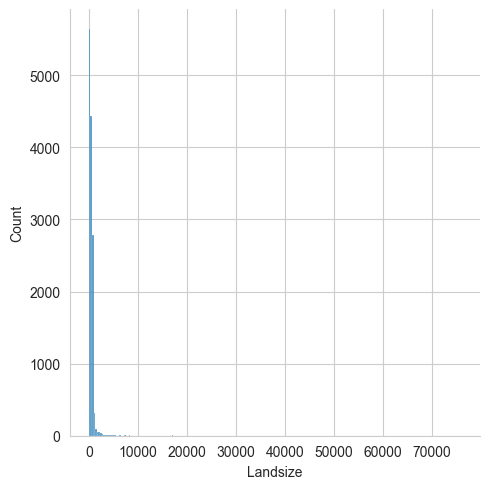

In [180]:
sns.displot(pd.DataFrame(df.loc[df['Landsize'] < 100000, 'Landsize']), x='Landsize')

Loop through variables with their own treatment plan

<Axes: xlabel='Landsize'>

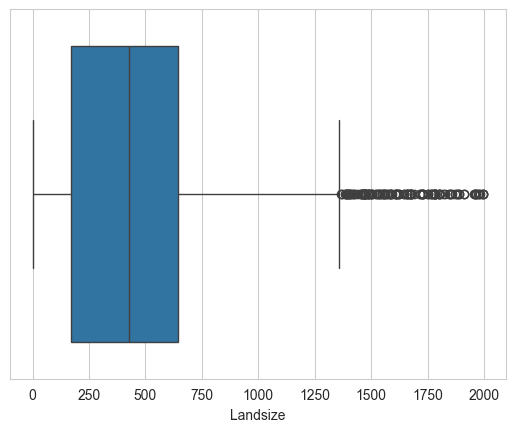

In [181]:
# sns.boxplot(df, x='Landsize')
sns.boxplot(pd.DataFrame(df.loc[df['Landsize'] < 2000, 'Landsize']), x='Landsize')

What values are considered anomalous?

In [182]:
q1 = stats.quantile(df.Landsize, 0.25)
q3 = stats.quantile(df.Landsize, 0.75)
iqr = q3 - q1

In [183]:
upper_whis = q3 + iqr * 1.5

In [184]:
upper_whis

np.float64(1362.0)

In [185]:
df.loc[df['Landsize'] > upper_whis]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year,Season
22,Abbotsford,138/56 Nicholson St,3,u,1090000.0,S,Jellis,2017-03-18,2.5,3067.0,...,27.0,NaN,Yarra,-37.80780,144.99650,Northern Metropolitan,4019.0,3,2017,Autumn
234,Armadale,526 Orrong Rd,4,h,3000000.0,VB,Jellis,2016-06-04,6.3,3143.0,...,NaN,1934.0,Stonnington,-37.85800,145.01110,Southern Metropolitan,4836.0,6,2016,Winter
236,Armadale,9/19 Mercer Rd,3,u,735000.0,PI,Marshall,2016-05-07,6.3,3143.0,...,14.0,1970.0,Stonnington,-37.85430,145.02620,Southern Metropolitan,4836.0,5,2016,Autumn
251,Armadale,367 Dandenong Rd,6,h,5525000.0,S,Marshall,2016-09-17,6.3,3143.0,...,516.0,1935.0,Stonnington,-37.86020,145.01300,Southern Metropolitan,4836.0,9,2016,Spring
266,Armadale,10/51 Armadale St,2,u,710000.0,S,Jellis,2017-02-25,6.3,3143.0,...,80.0,1970.0,Stonnington,-37.85730,145.01860,Southern Metropolitan,4836.0,2,2017,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13461,Keilor East,18 Heatherlea Cr,4,h,886000.0,S,Nelson,2017-08-26,11.7,3033.0,...,NaN,NaN,NaN,-37.74800,144.85098,Western Metropolitan,5629.0,8,2017,Winter
13483,Maribyrnong,88 The Esplanade,3,h,3400000.0,SP,Jas,2017-08-26,4.3,3032.0,...,187.0,1964.0,NaN,-37.76570,144.89109,Western Metropolitan,4918.0,8,2017,Winter
13487,Melton,21D Yuille St,5,h,710000.0,PI,Ryder,2017-08-26,31.7,3337.0,...,280.0,2000.0,NaN,-37.67813,144.59292,Western Victoria,3600.0,8,2017,Winter
13494,Monbulk,21 David St,4,h,720000.0,SP,Fletchers,2017-08-26,34.1,3793.0,...,NaN,NaN,NaN,-37.87931,145.41288,Eastern Victoria,1424.0,8,2017,Winter


<Axes: >

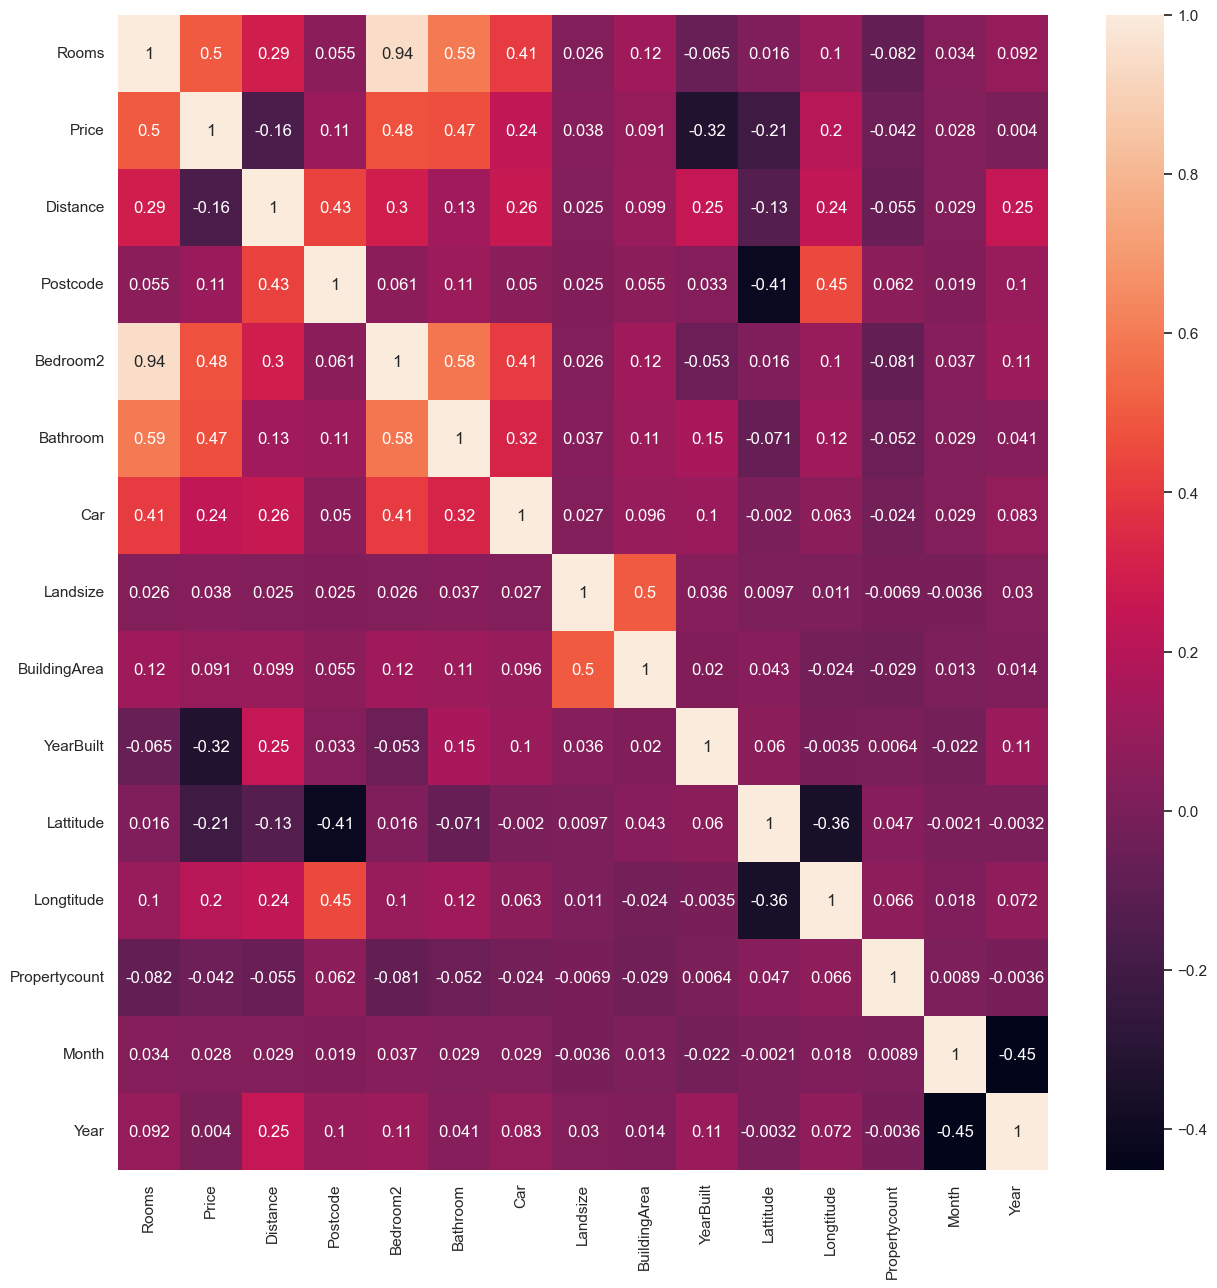

In [186]:
# Check pairwise correlations
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.set_theme(rc={"figure.figsize": (15, 15)})
sns.heatmap(correlation_matrix, annot=True)
# Rooms and Bedroom2 are a candidate

In [187]:
# Not sure what to do with multicollinearity
# I think yes Bedroom2 and Rooms are very correlated


In [188]:
import numpy as np

price_bin = [-np.inf, 200000, 1000000, np.inf]
price_labels = ['Cheap', 'Average', 'Expensive']
df['Price_Bin'] = pd.cut(x=df['Price'], bins=price_bin, labels=price_labels)

df[['Price', 'Price_Bin']].head()
# consider setting the bins to Z scores.
# what about converting to log first and then using Z scores? What are the value counts for each group?
# Do the bins do a good job of representing the houses?

,Price,Price_Bin
0,1480000.0,Expensive
1,1035000.0,Expensive
2,1465000.0,Expensive
3,850000.0,Average
4,1600000.0,Expensive


- Effect size leading to groups.
- Trying to make more assumptive statements about the data.
- Is a neighbourhood a good indicator of price?
- Price band based off subsets of the data.
- How much of an effect does it make to the model?

In [189]:
# Calculate Price Z score for each row
from scipy import stats

numeric_df_KNN['Price_Z'] = stats.zscore(numeric_df_KNN['Price'], nan_policy='omit')

In [190]:
numeric_df_KNN

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Month,Year,Price_Z
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,162.80000,1930.8,-37.79960,144.99840,4019.0,12,2016,0.632448
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.0,-37.80790,144.99340,4019.0,2,2016,-0.063640
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.0,-37.80930,144.99440,4019.0,3,2017,0.608984
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,145.98702,1959.4,-37.79690,144.99690,4019.0,3,2017,-0.353025
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.0,-37.80720,144.99410,4019.0,6,2016,0.820157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,147.80000,1981.0,-37.90562,145.16761,7392.0,8,2017,0.264851
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.0,-37.85927,144.87904,6380.0,8,2017,-0.069897
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,113.80000,1997.0,-37.85274,144.88738,6380.0,8,2017,0.147533
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.00000,1920.0,-37.85908,144.89299,6380.0,8,2017,2.227975


In [191]:
price_bins = [-np.inf, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, np.inf]
price_labels = ['Extremely Cheap', 'Very Cheap', 'Slightly Cheap', 'Average', 'Slightly Expensive', 'Very Expensive', 'Extremely Expensive']

numeric_df_KNN['Price_Bin'] = pd.cut(x=numeric_df_KNN['Price_Z'], bins=price_bins, labels=price_labels)

numeric_df_KNN[['Price', 'Price_Bin']]

,Price,Price_Bin
0,1480000.0,Slightly Expensive
1,1035000.0,Average
2,1465000.0,Slightly Expensive
3,850000.0,Average
4,1600000.0,Slightly Expensive
...,...,...
13575,1245000.0,Average
13576,1031000.0,Average
13577,1170000.0,Average
13578,2500000.0,Very Expensive


<Axes: xlabel='Price', ylabel='Count'>

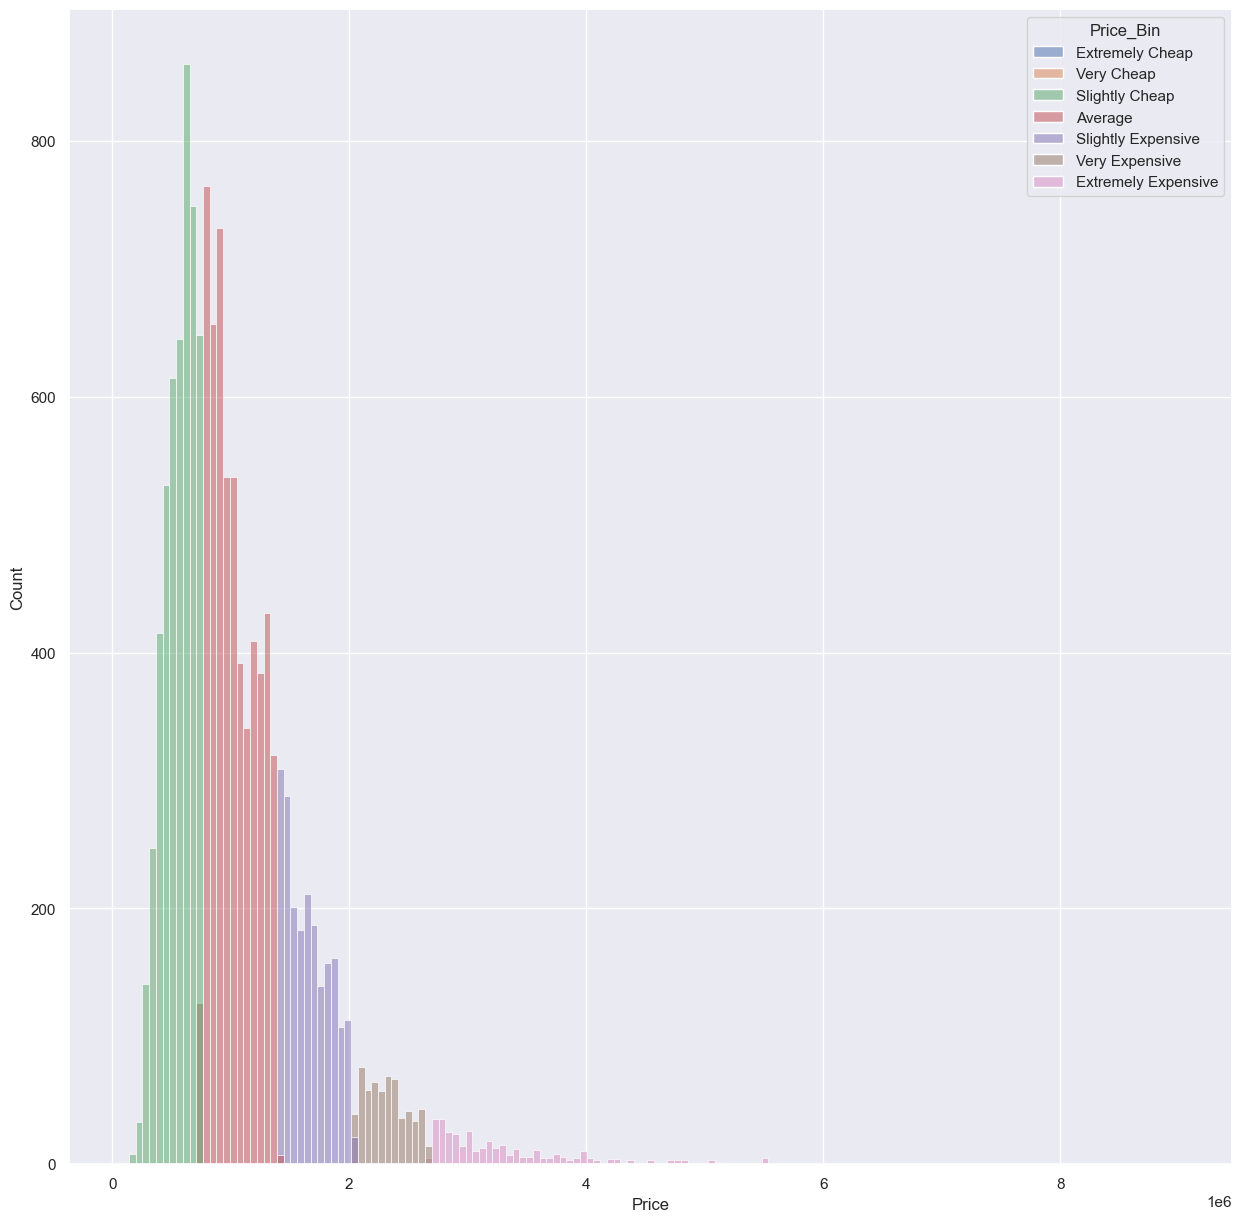

In [192]:
sns.histplot(numeric_df_KNN, x='Price', hue='Price_Bin')

In [193]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year,Season,Price_Bin
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,12,2016,Summer,Expensive
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,2,2016,Summer,Expensive
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3,2017,Autumn,Expensive
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3,2017,Autumn,Average
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,6,2016,Winter,Expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,2017-08-26,16.7,3150.0,...,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,8,2017,Winter,Expensive
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3016.0,...,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,8,2017,Winter,Expensive
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,2017-08-26,6.8,3016.0,...,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,8,2017,Winter,Expensive
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,3016.0,...,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,8,2017,Winter,Expensive


## Effect Size

- Categorical vs Categorical - CHI-Sq -> Cramer's V (The book has chi squared but doesn't mention effect size)

- Numerical Vs Numerical - Pearson's R (Linear Relationships), Spearman's Rank (Non-Linear Relationships)

- Categorical vs Numerical - ETA ^2

In [194]:
df['Price_Z'] = stats.zscore(df['Price'], nan_policy='omit')

price_bins = [-np.inf, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, np.inf]
price_labels = ['Extremely Cheap', 'Very Cheap', 'Slightly Cheap', 'Average', 'Slightly Expensive', 'Very Expensive', 'Extremely Expensive']

df['Price_Bin'] = pd.cut(x=df['Price_Z'], bins=price_bins, labels=price_labels)

df[['Price', 'Price_Bin']]

,Price,Price_Bin
0,1480000.0,Slightly Expensive
1,1035000.0,Average
2,1465000.0,Slightly Expensive
3,850000.0,Average
4,1600000.0,Slightly Expensive
...,...,...
13575,1245000.0,Average
13576,1031000.0,Average
13577,1170000.0,Average
13578,2500000.0,Very Expensive


In [197]:
price_bin_and_council_area = pd.crosstab(df['Price_Bin'], df['CouncilArea'])
# This is probably not the best approach as I'm turning a numerical field into a categorical but for the sake of practice let's look at chi2 and Cramer's V

In [198]:
# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(price_bin_and_council_area)

# Calculate Cramer's V for effect size
n = np.sum(price_bin_and_council_area.values)
min_dimension = min(price_bin_and_council_area.shape[0]-1, price_bin_and_council_area.shape[1]-1)
cramer_v = np.sqrt(chi2 / n / min_dimension)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Cramer's V: {cramer_v:.4f}")

# Are all my sales of the different houses? How much of a impact does this have?

Chi-square statistic: 4140.9321
P-value: 0.0000
Degrees of freedom: 160
Cramer's V: 0.2604


In [201]:
# t Distribution
# The sampling distribution that allows you to develop a confidence interval estimate of the mean using the sample standard deviation.
df.CouncilArea.value_counts()

CouncilArea
Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: count, dtype: int64

In [ ]:
# There is no difference between the two coucil areas Moreland and Boroodara. Null hypothesis.


It is important to keep in mind that just because an effect is
statistically significant does not mean that the effect is relevant.